In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [77]:
#加载房价表和租金表
df_price = pd.read_csv("Tianjin_price.csv", encoding="utf-8")
df_rent = pd.read_csv("Tianjin_rent.csv", encoding="utf-8")
print(df_price.describe())
print(df_rent.describe())

              area     location          price     isolated    location1  \
count  4750.000000  4750.000000    4750.000000  4750.000000  4750.000000   
mean     98.699478     2.505263   29067.374737     0.042316     0.252632   
std      58.109817     1.122837   22615.916070     0.201330     0.434567   
min      10.000000     1.000000    3805.000000     0.000000     0.000000   
25%      55.000000     1.000000   12500.000000     0.000000     0.000000   
50%      95.915000     3.000000   20373.000000     0.000000     0.000000   
75%     127.847500     4.000000   41279.250000     0.000000     1.000000   
max     670.000000     4.000000  130778.000000     1.000000     1.000000   

         location2    location3      multip1      multip2      multip3  
count  4750.000000  4750.000000  4750.000000  4750.000000  4750.000000  
mean      0.242105     0.252632    33.147413    27.377453    27.998402  
std       0.428403     0.434567    64.300945    54.508878    51.326859  
min       0.000000     

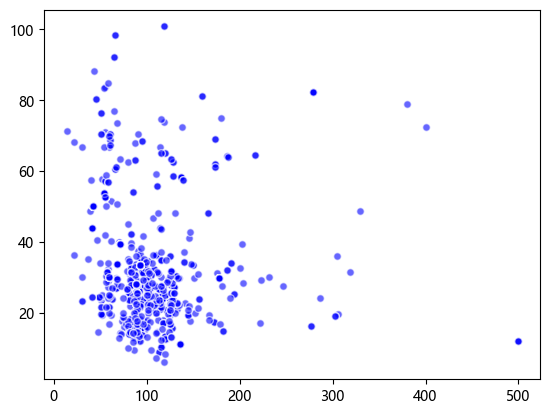

In [79]:
#租金表异常值检查
x_rent = df_rent["area"]
y_rent = df_rent["rent"]
plt.scatter(x_rent, y_rent, color = 'blue', alpha = 0.6, edgecolors = 'w', s = 30)

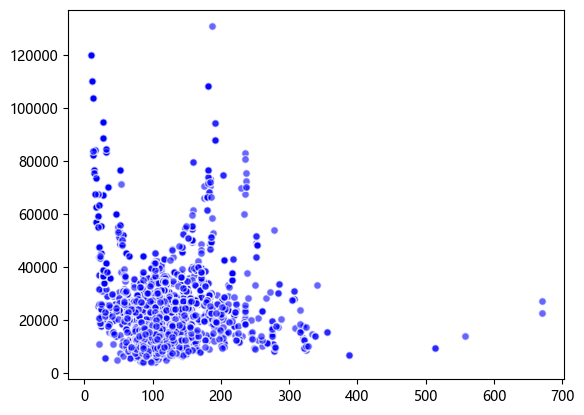

In [81]:
#房价表异常值检查
x_price = df_price["area"]
y_price = df_price["price"]
plt.scatter(x_price, y_price, color = 'blue', alpha = 0.6, edgecolors = 'w', s = 30)

In [83]:
#提取各区域数据
price = {}
price_mid = {}
rent = {}
rent_mid = {}
for i in range(4):
    price[i] = df_price[df_price["location"] == i + 1]
    rent[i] = df_rent[df_rent["location"] == i + 1]
    price_mid[i] = price[i]["price"].median()
    rent_mid[i] = rent[i]["rent"].median()

Text(0, 0.5, '房屋租售比中位数')

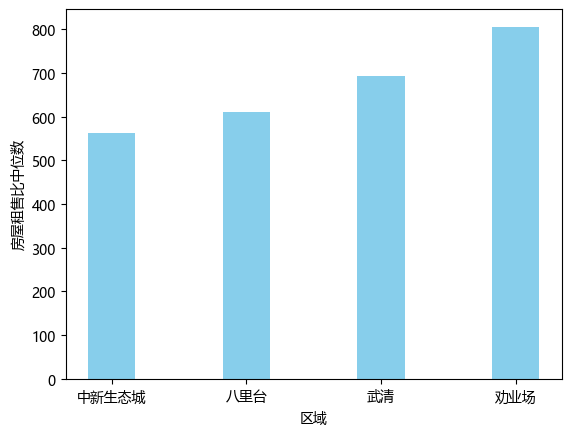

In [85]:
#绘制图A
ratio = []
labels = ["中新生态城","八里台","武清","劝业场"]
price_plot = list(price_mid.values())
rent_plot = list(rent_mid.values())
for i in range(4):
    ratio.append(price_plot[i] / rent_plot[i])
bar_width = 0.35
x = np.arange(len(labels))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.bar(x, ratio, width = bar_width, color='skyblue')
plt.xticks(x, labels) 
plt.xlabel("区域")
plt.ylabel("房屋租售比中位数")

In [95]:
#房价回归
X_price = df_price[["area", "location1", "location2", "location3", "multip1", "multip2", "multip3"]] 
y_price = df_price["price"]  
X_price = sm.add_constant(X_price)
model_price = sm.OLS(y_price, X_price).fit()
print(model_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     2237.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:53:48   Log-Likelihood:                -50900.
No. Observations:                4750   AIC:                         1.018e+05
Df Residuals:                    4742   BIC:                         1.019e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.879e+04    468.824    146.727      0.0

In [99]:
#租金回归
X_rent = df_rent[["area", "location1", "location2", "location3", "multip1", "multip2", "multip3"]] 
y_rent = df_rent["rent"]  
X_rent = sm.add_constant(X_rent)
model_rent = sm.OLS(y_rent, X_rent).fit()
print(model_rent.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     422.3
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          6.06e-279
Time:                        12:54:43   Log-Likelihood:                -3194.6
No. Observations:                 906   AIC:                             6405.
Df Residuals:                     898   BIC:                             6444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.3904      1.720     40.915      0.0

In [105]:
# 构建预测变量
predict50 = []  
predict100 = []  

# 遍历 4 个区域（假设有 4 个区域）
for i in range(4):
    temp50 = [50, 0, 0, 0, 0, 0, 0]  
    temp100 = [100, 0, 0, 0, 0, 0, 0]  
    if i != 3:
        # 设置区域虚拟变量
        temp50[i + 1] = 1  # 将对应区域的虚拟变量设为 1
        temp100[i + 1] = 1  # 将对应区域的虚拟变量设为 1
        
        # 设置区域与面积的交互项
        temp50[i + 4] = 50  # 将对应区域的交互项设为 50
        temp100[i + 4] = 100  # 将对应区域的交互项设为 100
    
    # 将当前区域的预测数据添加到列表中
    predict50.append(temp50)
    predict100.append(temp100)

In [109]:
predict100

[[100, 1, 0, 0, 100, 0, 0],
 [100, 0, 1, 0, 0, 100, 0],
 [100, 0, 0, 1, 0, 0, 100],
 [100, 0, 0, 0, 0, 0, 0]]

In [115]:
# 初始化存储预测数据和结果的列表
predict_x50 = []  # 存储面积为 50 的预测数据
predict_x100 = []  # 存储面积为 100 的预测数据
predicted50_price = []  # 存储面积为 50 的房价预测结果
predicted50_rent = []  # 存储面积为 50 的租金预测结果
predicted100_price = []  # 存储面积为 100 的房价预测结果
predicted100_rent = []  # 存储面积为 100 的租金预测结果

# 遍历 4 个区域
for i in range(4):
    # 将预测数据转换为 DataFrame，并设置列名与训练数据一致
    predict_x50.append(pd.DataFrame([predict50[i]], columns=X_price.columns[1:]))
    predict_x100.append(pd.DataFrame([predict100[i]], columns=X_price.columns[1:]))

    # 添加常数项，确保与训练数据格式一致
    predict_x50[i] = sm.add_constant(predict_x50[i], has_constant="add")
    predict_x100[i] = sm.add_constant(predict_x100[i], has_constant="add")

    # 使用房价模型和租金模型进行预测
    predicted50_price.append(model_price.predict(predict_x50[i]))
    predicted100_price.append(model_price.predict(predict_x100[i]))
    predicted50_rent.append(model_rent.predict(predict_x50[i]))
    predicted100_rent.append(model_rent.predict(predict_x100[i]))

Text(0, 0.5, '50平方米预测房屋租售比中位数')

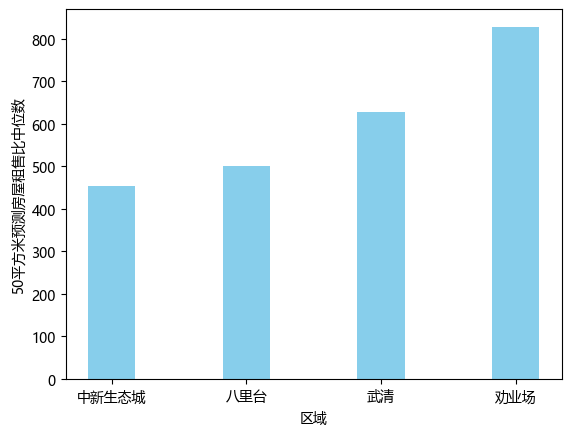

In [131]:
#画图
ratio_50predict = []
ratio_100predict = []
labels = ["中新生态城","八里台","武清","劝业场"]
#计算租售比
for i in range(4):
    ratio_50predict.append(predicted50_price[i][0] / predicted50_rent[i][0])
    ratio_100predict.append(predicted100_price[i][0] / predicted100_rent[i][0])
    
bar_width = 0.35
x = np.arange(len(labels))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.bar(x, ratio_50predict, width = bar_width, color='skyblue')
plt.xticks(x, labels) 
plt.xlabel("区域")
plt.ylabel("50平方米预测房屋租售比中位数")



# 初始化存储 50 平方米和 100 平方米预测租售比的列表
ratio_50predict = []  
ratio_100predict = []  
labels = ["中新生态城", "八里台", "武清", "劝业场"]

# 计算每个区域的租售比
for i in range(4):
    # 计算 50 平方米的租售比：房价预测值 / 租金预测值
    ratio_50predict.append(predicted50_price[i][0] / predicted50_rent[i][0])
    # 计算 100 平方米的租售比：房价预测值 / 租金预测值
    ratio_100predict.append(predicted100_price[i][0] / predicted100_rent[i][0])

bar_width = 0.35
x = np.arange(len(labels))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 绘制 50 平方米预测租售比的柱状图
plt.bar(x, ratio_50predict, width=bar_width, color='skyblue')
plt.xticks(x, labels)
plt.xlabel("区域")
plt.ylabel("50平方米预测房屋租售比中位数")

Text(0, 0.5, '100平方米预测房屋租售比中位数')

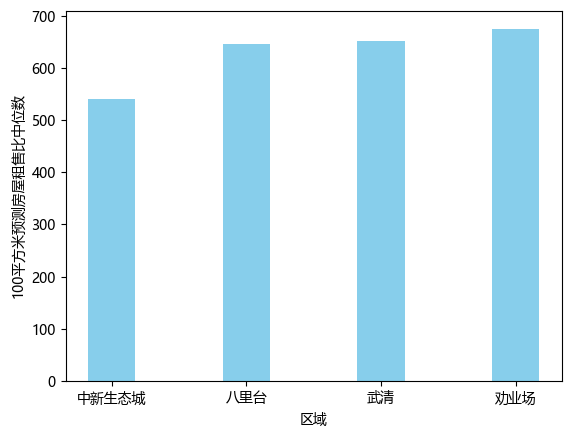

In [133]:
# 设置柱状图的宽度
bar_width = 0.35

# 创建 x 轴的位置（区域标签的位置）
x = np.arange(len(labels))

# 设置字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 绘制柱状图，表示 100 平方米的预测房屋租售比中位数
plt.bar(x, ratio_100predict, width=bar_width, color='skyblue')

# 设置 x 轴刻度标签
plt.xticks(x, labels)

# 设置 x 轴和 y 轴标签
plt.xlabel("区域")
plt.ylabel("100平方米预测房屋租售比中位数")